In [5]:
pip install pandas matplotlib


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.8 MB 15.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 347 kB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 9.0 MB/s  eta 0:00:01
     |████████████████████████████████| 113 kB 7.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

print("Pandas and Matplotlib are working!")


Matplotlib is building the font cache; this may take a moment.


Pandas and Matplotlib are working!


In [9]:
train_dir = "semeval_extracted/semeval_data/train"


In [10]:
train_dir = "/data/user/ssharm25/semeval_extracted/semeval_data/train"


In [11]:
print("Found files:", len(all_files))
print(all_files[:5])  # Show a few file names to confirm


Found files: 0
[]


In [19]:
ls /Users/sejalsharma/Documents


Article, Module 2.pdf
Assessment 2025.pages
BY245/
Figure 1.docx
India ticket.pdf
LOR.docx
MS in AI in Medicine Receipt.pdf
My academic and professional journey has centered on bridging biology with data.docx
NLP Paper Presentation.pdf
OPT Homebase Completion Certificate..pdf
OPT Recommendation Shacka for Sharma.pdf
OPT Recommendation.pdf
OPT-Academic-Advisor-Recommendation.pdf
Payment Receipt.pdf
Recent travel I94.pdf
Relation_Extraction_BERT_Full_40Slides.key
Sejal Notebook Assignment 1.html
Sejal Notebook Assignment 1_files/
Sejal_Resume_Application.pdf
Sejal_Sharma_NLP_Presentation_pdf.pdf
Sem.txt
Sharma_Sejal_ExcelSummarystats.xlsx
Sharma_Sejal_Experiment.docx
Sharma_Sejal_GraphicalAbstractPractice.docx
Sharma_Sejal_Swirl.docx
Sharma_Sejal_Swirl.pages
Sharma_Sejal_penguine figure caption.doc
Sop_Application.pdf
Untitled11 - Jupyter Notebook.html
Untitled11 - Jupyter Notebook_files/
assignment 2
i94 nov2.pdf
sem.ann
semeval_data 9/


Found files: 136
Number of annotations: 9081
Number of annotations after removing discontinuous offsets: 8329


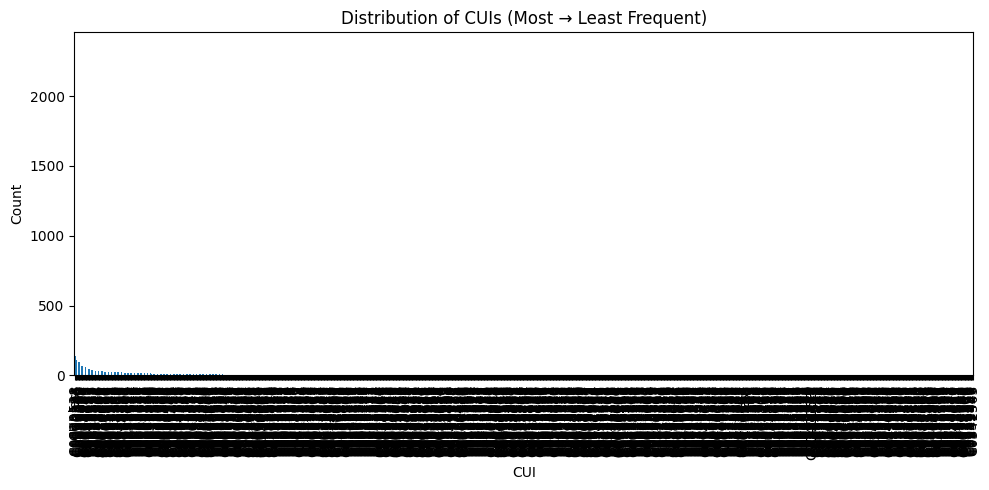

Imbalanced distribution: Some CUIs appear very frequently, while others appear rarely → makes modeling harder.
CUI-less annotations: Handling entities that couldn’t be mapped to UMLS CUIs.
Sparse data for rare entities: May require data augmentation or special modeling strategies.


In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 1. Correct path to your local SemEval folder
train_dir = "/Users/sejalsharma/Documents/semeval_data 9/train"

# ✅ 2. Check if the path exists before reading files
if not os.path.exists(train_dir):
    print(f"❌ Folder not found: {train_dir}")
else:
    # Collect all .pipe files
    pipe_files = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.endswith(".pipe")]
    print(f"Found files: {len(pipe_files)}")

    if len(pipe_files) == 0:
        print("⚠️ No .pipe files found in your train folder.")
    else:
        # ✅ 3. Load all files
        df_list = []
        for file in pipe_files:
            temp_df = pd.read_csv(file, sep='|', header=None, usecols=[0, 1, 2],
                                  names=["filename", "offsets", "CUI"])
            df_list.append(temp_df)

        # ✅ 4. Combine into one DataFrame
        df = pd.concat(df_list, ignore_index=True)
        print(f"Number of annotations: {len(df)}")

        # ✅ 5. Remove discontinuous annotations
        df = df[~df["offsets"].str.contains(",", na=False)]
        print(f"Number of annotations after removing discontinuous offsets: {len(df)}")

        # ✅ 6. Plot histogram of CUI distribution
        cui_counts = df["CUI"].value_counts()

        plt.figure(figsize=(10, 5))
        cui_counts.plot(kind="bar")
        plt.title("Distribution of CUIs (Most → Least Frequent)")
        plt.xlabel("CUI")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

        # ✅ 7. Print interpretation
        print("Imbalanced distribution: Some CUIs appear very frequently, while others appear rarely → makes modeling harder.")
        print("CUI-less annotations: Handling entities that couldn’t be mapped to UMLS CUIs.")
        print("Sparse data for rare entities: May require data augmentation or special modeling strategies.")
